In [8]:

#! pip3 install --upgrade google-cloud-aiplatform


In [9]:
from vertexai.preview.generative_models import (
    GenerationConfig,
    GenerativeModel,
    Image,
    Part,
)

In [10]:
from typing import Union

In [11]:
multimodal_model = GenerativeModel("gemini-pro-vision")

In [12]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_file(filepath: str) -> bytes:
    with open(filepath, "rb") as f:
        image_bytes = f.read()
    return image_bytes


def load_image_from_file(image_bytes: str) -> Image:
    image_bytes = get_image_bytes_from_file(image_bytes)
    return Image.from_bytes(image_bytes)


def display_content_as_image(content: Union[str, Image, Part]) -> bool:
    if not isinstance(content, Image):
        return False
    display_images([content])
    return True


def display_content_as_video(content: Union[str, Image, Part]) -> bool:
    if not isinstance(content, Part):
        return False
    part = typing.cast(Part, content)
    file_path = part.file_data.file_uri.removeprefix("gs://")
    video_url = f"https://storage.googleapis.com/{file_path}"
    IPython.display.display(IPython.display.Video(video_url, width=600))
    return True


def print_multimodal_prompt(contents: list[Union[str, Image, Part]]):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if display_content_as_image(content):
            continue
        if display_content_as_video(content):
            continue
        print(content)

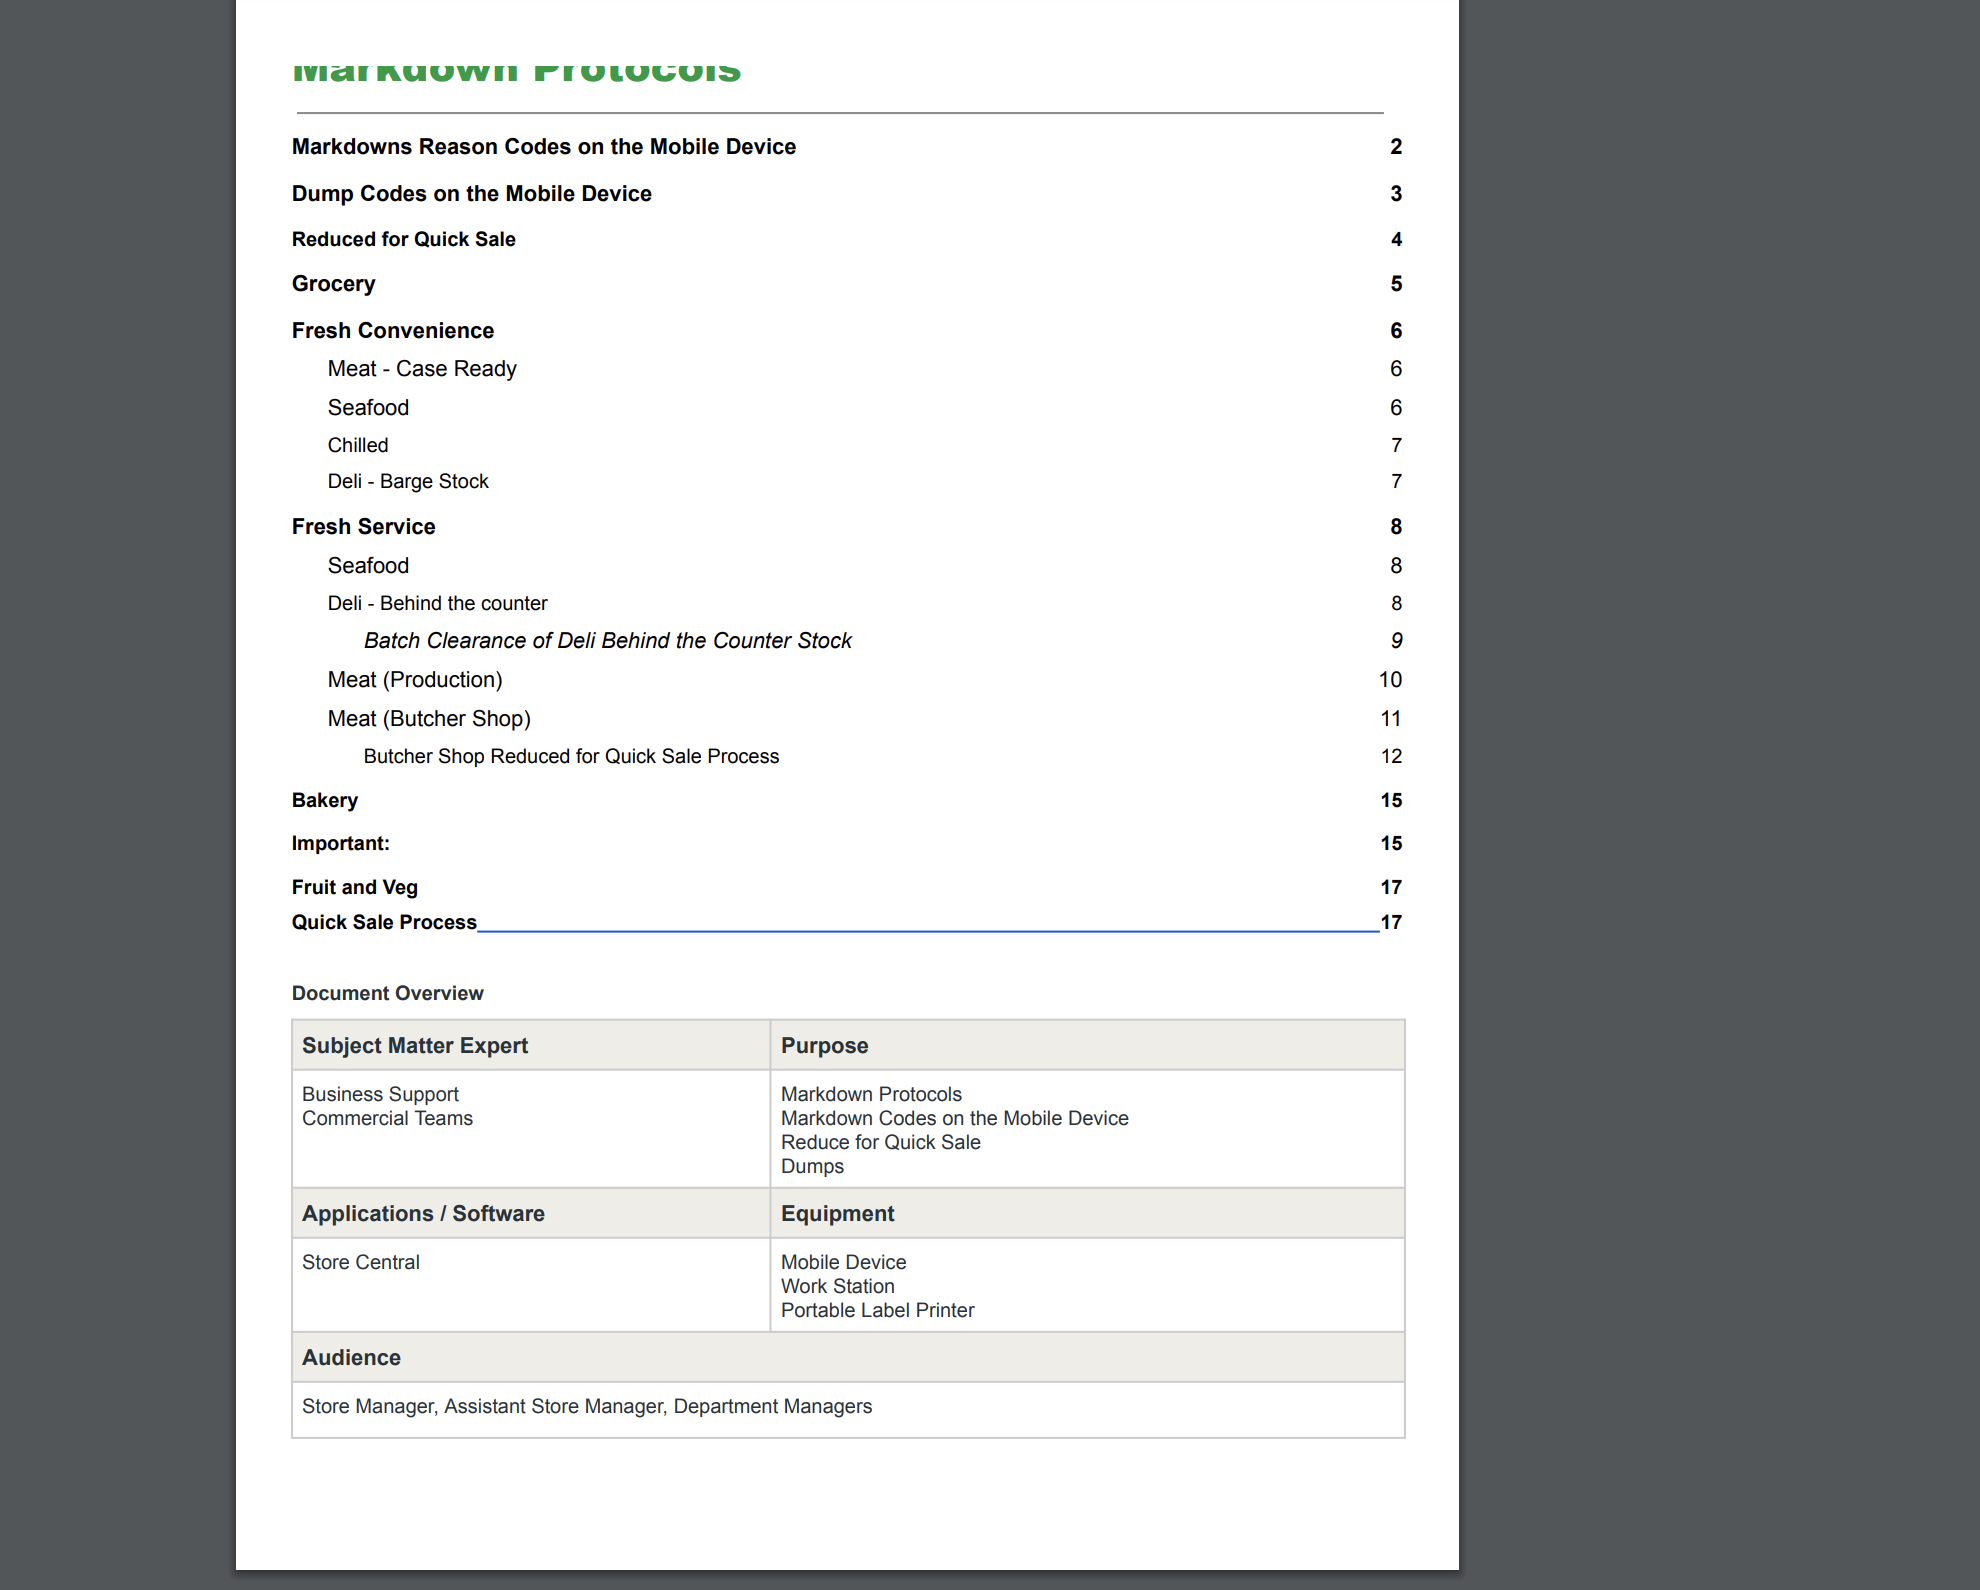

In [13]:
toc_image_path = "data/images/Woolies_TOC.png"
toc_image = load_image_from_file(toc_image_path)
toc_image

-------Prompt--------
Instructions: Consider the following image that contains a table of contents:


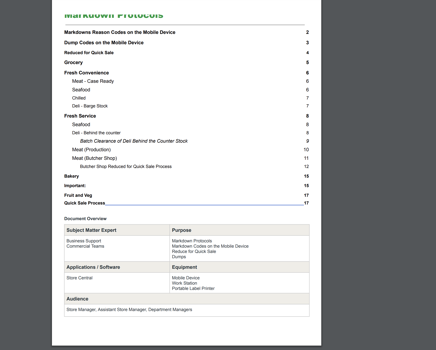

Carefully look at this image and display the full table of contents from this image in an easy to read format.

Take the following steps:
Step 1: Carefully analyze the image and look for where table of contents are
Step 2: Each line in the table of contents has the following format:
        The name of the topic is on the left and the page number it is mentioned on is to the right.
        
Step 3: Make sure to include every section mentioned in the original table of contents along with its page number.
Step 4: Show the table of contents in an easy to read format. 
Step 5: Double check your work. Don't include any lines that do not have a page number to the right of the topic name. Don't include lines that are not part of the table of contents

Answer and describe the steps taken:



-------Response--------


 **Markdown Protocols**

- Markdown Reasons Codes on the Mobile Device ....................................................... 2
- Dump Codes on the Mobile Device ............................................................... 3
- Reduced for Quick Sale ......................................................................... 4
- Grocery ................................................................................... 5
- Fresh Convenience ............................................................................ 6
- Meat - Case Ready ............................................................................ 6
- Chilled ................................................................................... 6
- Deli - Barge Stock ............................................................................ 7
- Seafood ................................................................................... 8
- Fresh Service ....................................................................

In [14]:
instructions = "Instructions: Consider the following image that contains a table of contents:"
prompt1 = "Carefully look at this image and display the full table of contents from this image in an easy to read format."
prompt2 = """
Take the following steps:
Step 1: Carefully analyze the image and look for where table of contents are
Step 2: Each line in the table of contents has the following format:
        The name of the topic is on the left and the page number it is mentioned on is to the right.
        
Step 3: Make sure to include every section mentioned in the original table of contents along with its page number.
Step 4: Show the table of contents in an easy to read format. 
Step 5: Double check your work. Don't include any lines that do not have a page number to the right of the topic name. Don't include lines that are not part of the table of contents

Answer and describe the steps taken:

"""
contents = [
    instructions,
    toc_image,
    prompt1,
    prompt2,
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")